### Imports

In [1]:
# coding: utf-8
import string
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from nltk.stem import RSLPStemmer
from graphviz import Source
from collections import Counter
from IPython.display import display
from IPython.display import SVG
# nltk.download('stopwords')
# nltk.download('rslp')
# conda install graphviz

In [2]:
# %%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# method to remove stopwords
def RemoveStopWords(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    listW = ""
    for wrd in sent.split(" "):
        if wrd not in stp:
            listW += str(wrd)+" "
    return listW

In [5]:
def stemming(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    stemmer = nltk.stem.RSLPStemmer()
    listW = []
    for (desc, value) in sent:
        aux = [str(stemmer.stem(p))
                       for p in desc.split() if p not in stp]
        listW.append((aux, value))
    return listW

In [6]:
def tokenize(sent):
    sent = sent.lower()
    sent = nltk.tokenize.word_tokenize(sent, language='portuguese')
    return sent

In [7]:
def stemmingSimple(sent):
    stp = nltk.corpus.stopwords.words('portuguese')
    stemmer = RSLPStemmer()
    listW = []
    for wrd in sent:
        for p in wrd.split():
            if p not in stp:
                wrd = stemmer.stem(wrd.lower())
                listW.append(wrd)
    return listW

In [8]:
def addAllWords(sent):
    words = []
    for (desc, value) in sent:
        words.extend(desc)
    return words

In [9]:
def freqWords(sent):
    wrds = nltk.FreqDist(sent)
    return wrds

In [10]:
def uniqueWords(sent):
    freq = sent.keys()
    return freq

In [11]:
def extractWords(sent):
    doc = set(sent)
    characteristics = {}
    for wdr in u_words_train:
        characteristics['%s' % wdr] = (wdr in doc)
    return characteristics

In [12]:
def models(X_train, Y_train, X_test, Y_test):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    log_pred = log.predict(X_test)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    svc_lin_pred = svc_lin.predict(X_test)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    svc_rbf_pred = svc_rbf.predict(X_test)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    gauss_pred = gauss.predict(X_test)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit (X_train, Y_train)
    tree_pred = tree.predict(X_test)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    forest_pred = forest.predict(X_test)
    
    from sklearn.linear_model import Perceptron
    pcp = Perceptron(random_state = 0)
    pcp.fit(x_train, y_train)
    pcp_pred = pcp.predict(x_test)
    
    from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
    mnb = MultinomialNB(alpha=.01)
    mnb.fit(x_train, y_train)
    mnb_pred = mnb.predict(x_test)
    
    bnb = BernoulliNB(alpha=.01)
    bnb.fit(x_train, y_train)
    bnb_pred = bnb.predict(x_test)
    
    cnb = ComplementNB(alpha=.1)
    cnb.fit(x_train, y_train)
    cnb_pred = cnb.predict(x_test)
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[0]Logistic Regression Testing Accuracy: ', accuracy_score(Y_test, log_pred))
    print(classification_report(y_test, log_pred))
    
    print('[1]KNeighborns Training Accuracy: ', knn.score(X_train, Y_train))
    print('[1]KNeighborns Testing Accuracy: ', accuracy_score(Y_test, knn_pred))
    print(classification_report(y_test, knn_pred))
    
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[2]SVC Linear Testing Accuracy: ', accuracy_score(Y_test, svc_lin_pred))
    print(classification_report(y_test, svc_lin_pred))
    
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[3]SVC RBF Testing Accuracy: ', accuracy_score(Y_test, svc_rbf_pred))
    print(classification_report(y_test, svc_rbf_pred))
    
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[4]Gaussian NB Testing Accuracy: ', accuracy_score(Y_test, gauss_pred))
    print(classification_report(y_test, gauss_pred))
    
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[5]Decision Tree Testing Accuracy: ', accuracy_score(Y_test, tree_pred))
    print(classification_report(y_test, tree_pred))
    
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    print('[6]Random Forest Testing Accuracy: ', accuracy_score(Y_test, forest_pred))
    print(classification_report(y_test, forest_pred))
    
    print('[7] Perceptron Training Accuracy: ', pcp.score(X_train, Y_train))
    print("[7] Perceptron Testing accuracy: ", accuracy_score(y_test, pcp_pred))
    print(classification_report(y_test, pcp_pred))
    
    print('[8] MultinomialNB Training Accuracy: ', mnb.score(X_train, Y_train))
    print("[8] MultinomialNB Testing accuracy: ", accuracy_score(Y_test, mnb_pred))
    print(classification_report(y_test, pcp_pred))
    
    print('[9] BernoulliNB Training Accuracy: ', bnb.score(X_train, Y_train))
    print("[9] BernoulliNB Testing accuracy: ", accuracy_score(Y_test, bnb_pred))
    print(classification_report(y_test, pcp_pred))

    print('[10] ComplementNB Training Accuracy: ', cnb.score(X_train, Y_train))
    print("[10] ComplementNB Testing accuracy: ", accuracy_score(Y_test, cnb_pred))
    print(classification_report(y_test, pcp_pred))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, pcp, mnb, bnb, cnb

In [13]:
def makeAcuracy(tree,x_test,y_test):
    predictions = clf.predict(x_test)
    erro = 0.0
    for x in range(len(predictions)):
        if predictions[x] != y_test[x]:
            erro += 1.
    acuracy = (1-(erro/len(predictions)))
    return acuracy

In [14]:
# ocomon_train_2.0 had your values analyseds individualy and it was seted the class manually
df_train = pd.read_csv('CSV/ocomon_train_2.0.csv', usecols=['DESCRIB', 'HAS_VALUE'])
df_test = pd.read_csv('CSV/ocomon_test_2.0.csv', usecols=['DESCRIB', 'HAS_VALUE'])

In [15]:
df_train.sample(3)

,DESCRIB,HAS_VALUE
887,proreitoria de assuntos estudantis e comunita...,NP
92,da solicitacao stcnome elis rejane silva oliv...,NP
2475,necessita formatacao computador formatado man...,NP


In [16]:
df_train.loc[1]

DESCRIB      no break nao funciona   solucao para este prob...
HAS_VALUE                                                    P
Name: 1, dtype: object

In [17]:
df_test.sample(3)

,DESCRIB,HAS_VALUE
13232,nao liga null impressoras,NP
2761,nï¿½o liga solucao para este problemaentregue ...,NaN
2474,foi solicitado a manutencao de pontos de reded...,NaN


In [18]:
df_train.describe()

,DESCRIB,HAS_VALUE
count,2999,2999
unique,2903,2
top,placa mae defeito solucao para este problema...,NP
freq,18,2661


In [19]:
df_test.describe()

,DESCRIB,HAS_VALUE
count,15802,10795
unique,14547,2
top,placa mae queimada solucao para este problema ...,NP
freq,103,8855


In [20]:
# here was declareted a array to store all descriptions from dataframe in column "DESCRIB"
describ_train = []
describ_test = []
# store a class from description
classifier_train = []
classifier_test = []

In [21]:
for line in df_train['DESCRIB']:
    regex = r"(null|(a)a+|(e)e+|(i)i+|(o)o+|(u)u+|(b)b+|(c)c+|(d)d+|(e)e+|(f)f+|(g)g+|(h)h+|(j)j+|(k)k+|(l)l+|(m)m+|(n)n+|(p)p+|(q)q+|(r)rr+|(s)ss+|(t)t+|(u)u+|(v)v+|(x)x+|(z)z+)"
    subst = "\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\\12\\13\\14\\15\\16\\17\\18\\19\\20\\21\\22\\23\\24\\25\\26\\27"
    result = re.sub(regex, subst, line.lower(), 0, re.MULTILINE | re.IGNORECASE)
    result = RemoveStopWords(result)
    describ_train.append(result)
    
for line in df_test['DESCRIB']:
    regex = r"(null|(a)a+|(e)e+|(i)i+|(o)o+|(u)u+|(b)b+|(c)c+|(d)d+|(e)e+|(f)f+|(g)g+|(h)h+|(j)j+|(k)k+|(l)l+|(m)m+|(n)n+|(p)p+|(q)q+|(r)rr+|(s)ss+|(t)t+|(u)u+|(v)v+|(x)x+|(z)z+)"
    subst = "\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\\12\\13\\14\\15\\16\\17\\18\\19\\20\\21\\22\\23\\24\\25\\26\\27"
    result = re.sub(regex, subst, line.lower(), 0, re.MULTILINE | re.IGNORECASE)
    result = RemoveStopWords(result)
    describ_test.append(result)

In [22]:
describ_train[1]

'break nao funciona   solucao problema     manutencao nobreak '

In [23]:
for line in df_train['HAS_VALUE']:
    classifier_train.append(line)
for line in df_test['HAS_VALUE']:
    classifier_test.append(line)

In [24]:
train = []
i = 0
for line in describ_train:
    aux = []
    aux.append(line)
    aux.append(classifier_train[i])
    train.append(aux)
    i += 1
    
test = []
i = 0
for line in describ_test:
    aux = []
    aux.append(line)
    aux.append(classifier_test[i])
    test.append(aux)
    i += 1

In [25]:
train[1]

['break nao funciona   solucao problema     manutencao nobreak ', 'P']

In [26]:
# applie stemming in each list
train = stemming(train)
test = stemming(test)

In [27]:
train[1]

(['break', 'nao', 'func', 'soluca', 'problem', 'manutenca', 'nobreak'], 'P')

In [28]:
# create a list of all word finded to train set
words_train = addAllWords(train)
#words_train

In [29]:
# create a list of all word finded to test set
words_test = addAllWords(test)

In [30]:
# list frequency of all words in the list of describ
f_words_train = freqWords(words_train)
f_words_train

FreqDist({'email': 2295, 'problem': 2175, 'solicitaca': 2071, 'nao': 1357, 'comput': 1284, 'soluca': 1216, 'instal': 1055, 'cri': 848, 'instalaca': 799, 'red': 785, ...})

In [31]:
f_words_train2 = sorted(f_words_train.items(), key=lambda x: x[1],  reverse=True)

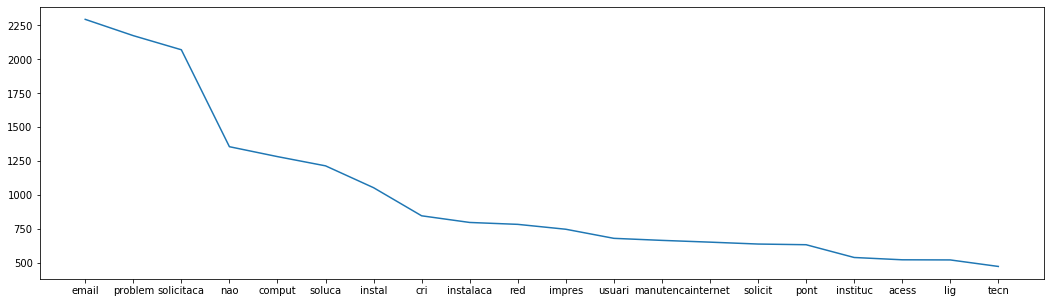

In [32]:
ky = []
vl = []
for key, value in f_words_train2:
    ky.append(key)
    vl.append(value)
    
plt.figure(figsize=(18,5))
plt.plot(ky[0:20], vl[0:20])
plt.show()

In [33]:
# list frequency of all words in the list of describ
f_words_test= freqWords(words_test)

In [34]:
# dictionary of words distinct in the list of train set
u_words_train = uniqueWords(f_words_train)

# dictionary of words distinct in the list of test set
u_words_test = uniqueWords(f_words_test)

### FUNTIONALITY VERIFICATION

In [35]:
# verify weither a word is inside of list of words in describ columns from dataframe ocomon
phrse = 'ola esse e um teste se esta funcionando'
phrse = tokenize(phrse)
phrse = stemmingSimple(phrse)
#phrse = stemming(phrse)
phrse

['ola', 'test', 'funcion']

In [36]:
x, y = train_test_split(train, test_size = 0.3, random_state = 100)

baseTrue = nltk.classify.apply_features(extractWords,train)

baseOfTrain = nltk.classify.apply_features(extractWords,x)
baseOfTest = nltk.classify.apply_features(extractWords,y)

complet = nltk.classify.apply_features(extractWords,test)

In [37]:
#baseTrue[545][0]

### TRUE

In [38]:
x_true = [] #FEATURES
y_true = [] #LABELS
for element in baseTrue:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_true.append(aux)
    y_true.append(element[1])

### TRAIN

In [39]:
x_train = [] #FEATURES
y_train = [] #LABELS
for element in baseOfTrain:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_train.append(aux)
    y_train.append(element[1])

### TEST

In [40]:
x_test = [] #FEATURES
y_test = [] #LABELS
for element in baseOfTest:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    x_test.append(aux)
    y_test.append(element[1])

### COMPLET

In [41]:
cpl = [] #FEATURES
for element in complet:
    aux = []
    for key, value in element[0].items():
        aux.append(value)
    cpl.append(aux)

# CLASSIFICATIONS

In [42]:
#graph = Source(tree.export_graphviz(clf, out_file=None, filled = True, class_names=['P', 'NP', 'nan']))
#display(SVG(graph.pipe(format='svg')))

In [43]:
mod = models(x_train,y_train, x_test, y_test)

[0]Logistic Regression Training Accuracy:  0.9933301572177228
[0]Logistic Regression Testing Accuracy:  0.9744444444444444
              precision    recall  f1-score   support

          NP       0.98      1.00      0.99       803
           P       0.96      0.79      0.87        97

    accuracy                           0.97       900
   macro avg       0.97      0.90      0.93       900
weighted avg       0.97      0.97      0.97       900

[1]KNeighborns Training Accuracy:  0.96141019533111
[1]KNeighborns Testing Accuracy:  0.9522222222222222
              precision    recall  f1-score   support

          NP       0.96      0.99      0.97       803
           P       0.90      0.63      0.74        97

    accuracy                           0.95       900
   macro avg       0.93      0.81      0.86       900
weighted avg       0.95      0.95      0.95       900

[2]SVC Linear Training Accuracy:  0.9980943306336351
[2]SVC Linear Testing Accuracy:  0.9666666666666667
             

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision_P' : make_scorer(precision_score, pos_label='P'),
           'precision_NP' : make_scorer(precision_score, pos_label='NP'),
           'recall_P' : make_scorer(recall_score, pos_label='P'),
           'recall_NP' : make_scorer(recall_score, pos_label='NP'), 
           'f1_score_P' : make_scorer(f1_score, pos_label='P'),
           'f1_score_NP' : make_scorer(f1_score, pos_label='NP')}
kfold = KFold(n_splits=10, random_state=42)

cross = cross_validate(mod[0], x_train+x_test, y_train+y_test, return_train_score=False,
               cv=kfold,scoring=scoring)

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [45]:
for key in cross:
    print(key, '->', cross[key].mean())

fit_time -> 1.928558588027954
score_time -> 0.11469266414642335
test_accuracy -> 0.9739955406911929
test_precision_P -> 0.9400766417678181
test_precision_NP -> 0.9781649655073075
test_recall_P -> 0.8253435415935415
test_recall_NP -> 0.9928652609013409
test_f1_score_P -> 0.8776878927019149
test_f1_score_NP -> 0.985439710942595


In [46]:
y_pred_cpl = mod[0].predict(cpl)

In [47]:
df = pd.DataFrame({'HAS_VALUE': y_pred_cpl})
df.to_csv('prediction_ocomon_log.csv', index=False)

In [48]:
df.sample(5)

,HAS_VALUE
3758,NP
14975,NP
5836,NP
12680,P
14223,P


In [49]:
new_df = pd.read_csv('CSV/ocomon_test_2.0.csv')
new_df.tail(2)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,s.o,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15801,computador nao liga aberto por felipe a null ...,NaN,hardware,hardware,computador,teresina,lucas lopes,bolsista geral 2018,161603,NP,...,8,54,18/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central


In [50]:
new_df['HAS_VALUE'] = df.HAS_VALUE.tolist()
new_df.tail(2)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,s.o,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15801,computador nao liga aberto por felipe a null ...,NaN,hardware,hardware,computador,teresina,lucas lopes,bolsista geral 2018,161603,NP,...,8,54,18/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central


In [51]:
new_df.to_csv('ocomon_log.csv', index=False)

In [52]:
new_df.head()

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,N.A,ponto de rede,teresina,jaclason machado veras,julia sousa santos,-999999,NP,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,hardware,computador,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,P,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central
3,desabilite o envio de email como o servico de ...,utilize esta descricao de problema para proble...,N.A,N.A,e-mail,teresina,guilherme,guilherme avelino,-999999,NP,...,13,20,24/10/2011,1,4,4,17,6,26/10/2011,sti_central
4,instalacao de impressoras e remocao de virus ...,NaN,hardware,virus,impressora,teresina,NaN,bolsista nti,-999999,NP,...,12,13,24/10/2011,1,4,4,9,11,26/10/2011,sti_central


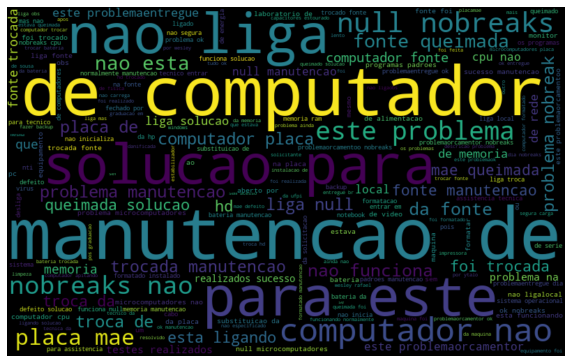

In [55]:
from wordcloud import WordCloud
negative_words = ' '.join([text for text in new_df['DESCRIB'][df['HAS_VALUE']=='P']])
wordcloud = WordCloud(width=800, height = 500, random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
def models2(X_train, Y_train, X_test, Y_test):
    from sklearn.linear_model import LogisticRegression
    import numpy as np
    from sklearn.metrics import roc_auc_score
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    log_pred = log.predict(X_test)
    
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X=LabelEncoder()
    y = labelencoder_X.fit_transform(Y_test)
    y2 = labelencoder_X.fit_transform(log_pred)
    roc_auc_score(y,y2)
    return y, y2

In [73]:
mod = models2(x_train,y_train, x_test, y_test)

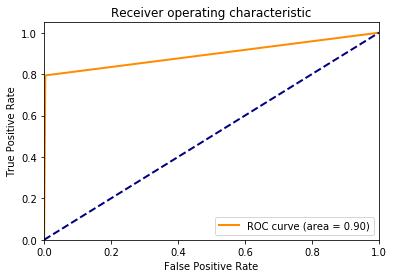

In [79]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = metrics.roc_curve(mod[0], mod[1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()